# Setup

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import cluster

In [2]:
INPUT_DIR = "../../data/input/"
OUTPUT_DIR = "../../data/output/"

# Load data

In [3]:
df = pd.read_csv(OUTPUT_DIR + "dataset.csv")
df.head()

,AvgCyclomatic,AvgCyclomaticModifiedRatio,AvgCyclomaticStrictRatio,AvgEssential,AvgLine,AvgLineBlankRatio,AvgLineCodeRatio,AvgLineCommentRatio,CountDeclClass,CountDeclClassMethodRatio,...,AvgCountClassBase,AvgCountClassCoupled,AvgCountClassDerived,MaxInheritanceTree,AvgPercentLackOfCohesion,AvgCountInput,AvgCountOutput,AvgCountPath,MaxNesting,Bug
0,1.0,1.0,1.0,1.0,9.0,0.000000,0.666667,0.111111,1.0,0.0,...,1.0,18.0,1.0,1.0,70.0,6.176471,3.941176,2.058824,2.0,0
1,2.0,1.0,1.0,1.0,8.0,0.000000,0.875000,0.000000,2.0,0.0,...,1.5,8.5,0.0,1.0,33.5,6.142857,3.142857,2.666667,3.0,0
2,2.0,1.0,1.0,1.0,14.0,0.071429,0.785714,0.071429,1.0,0.0,...,3.0,53.0,0.0,2.0,90.0,4.476190,4.142857,5.571429,4.0,0
3,2.0,1.0,1.0,1.0,29.0,0.034483,0.448276,0.482759,1.0,0.0,...,1.0,26.0,0.0,1.0,0.0,8.750000,5.750000,2.750000,2.0,0
4,2.0,1.0,1.5,1.0,17.0,0.117647,0.705882,0.117647,1.0,0.0,...,1.0,17.0,0.0,4.0,66.0,5.833333,8.500000,4.333333,2.0,0


# Correlation analysis

<AxesSubplot:>

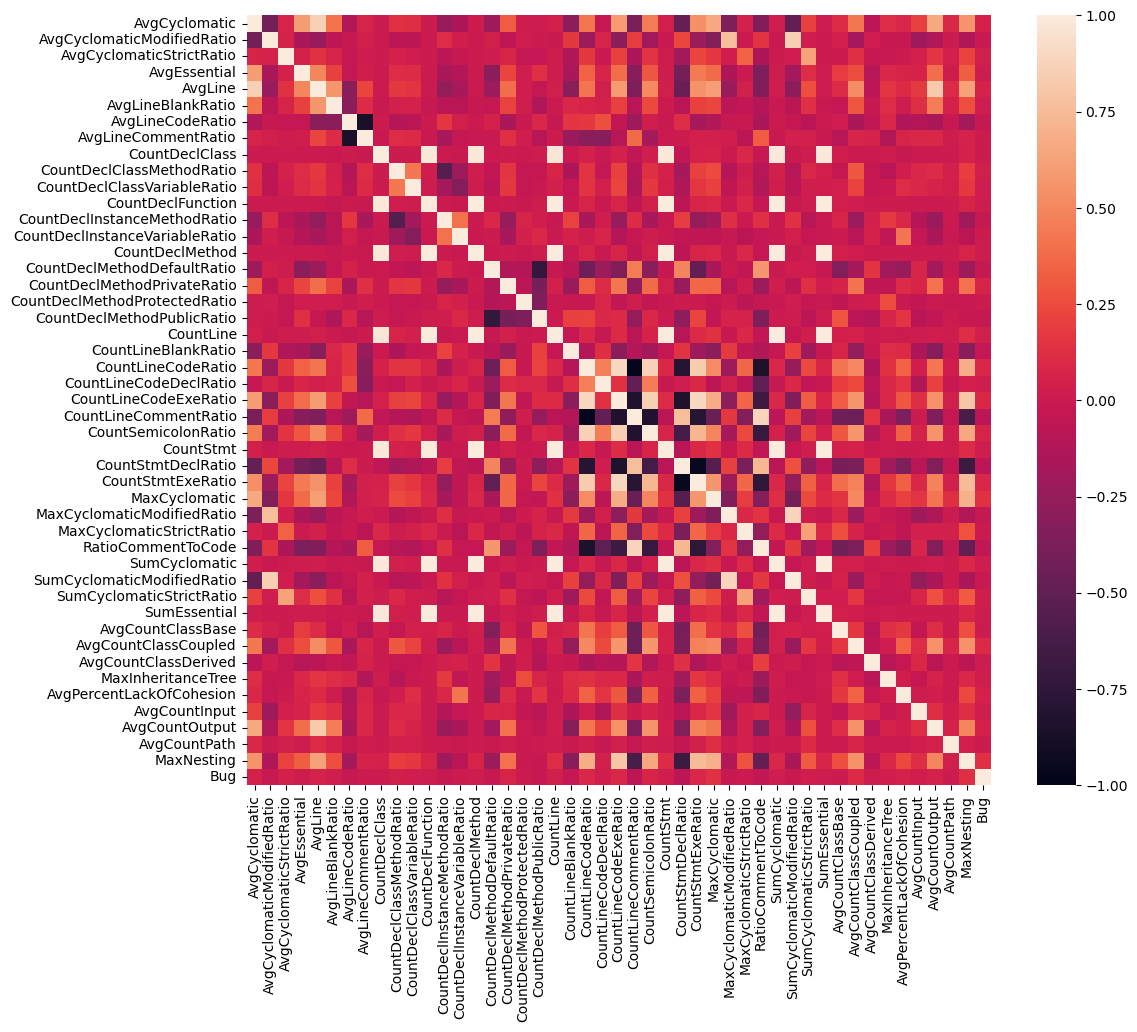

In [4]:
plt.figure(figsize=(12, 10))
r = df.corr()
sns.heatmap(r, vmin=-1, vmax=1)

## Variables clustering

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - abs(r)
Z = linkage(squareform(dissimilarity), method="complete")

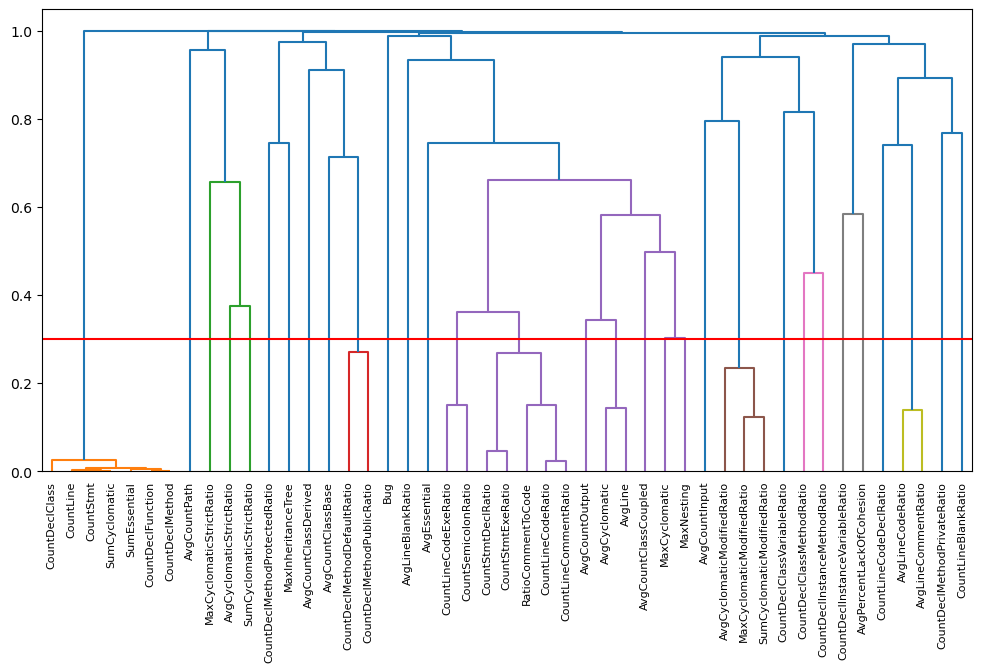

In [6]:

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.columns, orientation="top", leaf_rotation=90)
plt.axhline(y = .3, c="red")

Let us retain one independant variable for every cluster with a dissimilarity below 0.3.

In [7]:
df = df.drop(['CountLine', 'CountStmt', 'SumCyclomatic', 'SumEssential', 'CountDeclFunction', 'CountDeclMethod', 
              'CountDeclMethodDefaultRatio', 'CountLineCodeExeRatio', 'CountSemicolonRatio', 'CountStmtDeclRatio',
              'CountStmtExeRatio', 'CountLineCodeRatio', 'CountLineCommentRatio', 'AvgLine', 
              'MaxCyclomaticModifiedRatio', 'SumCyclomaticModifiedRatio', 'AvgLineCommentRatio'
             ], axis=1)

The dissimilartity dendrogram of the remaining variable confirm that no two variables ahve a correlation above 0.70.

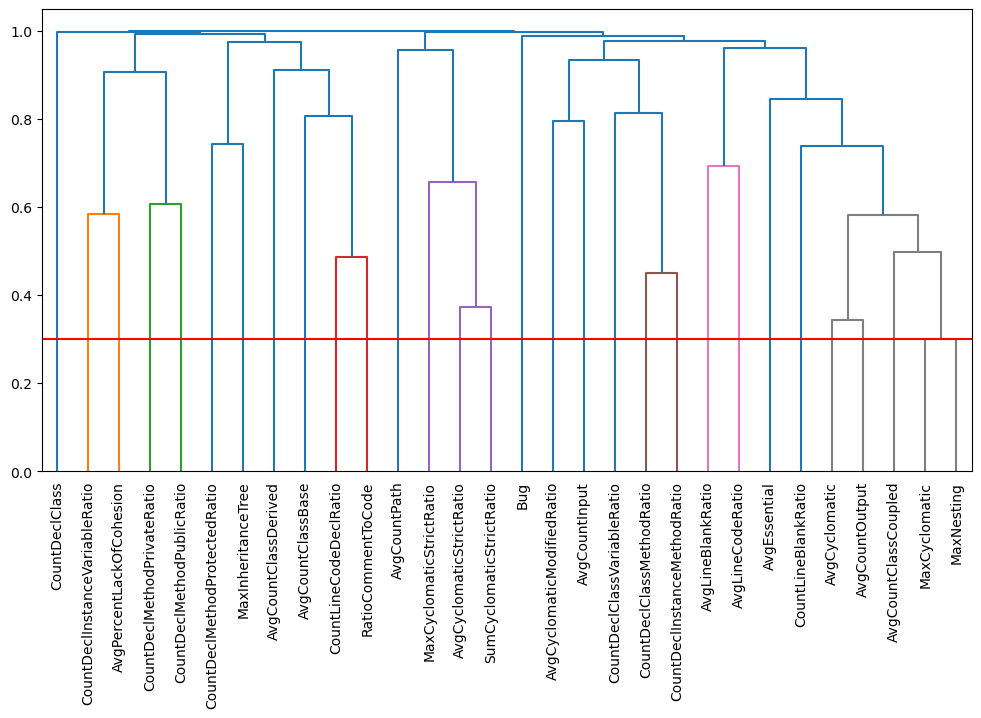

In [8]:
dissimilarity = 1 - abs(df.corr())
Z = linkage(squareform(dissimilarity), method="complete")

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df.columns, orientation="top", leaf_rotation=90)
plt.axhline(y = .3, c="red")

Lets shuffle this final dataset and save this new order.

In [21]:
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv(OUTPUT_DIR + "dataset_independent.csv", index=False)

## 10 Fold Cross Validation

To validate our models, we will use a 10 fold cross validation. Lets split the data into equal sets.

In [29]:
import numpy as np

df = pd.read_csv(OUTPUT_DIR + "dataset_independent.csv")
sets = np.array_split(df,10)